In [115]:
import datasets
import math

In [117]:
titanic_people = datasets.load_titanic()

titanic_people[2]

{'pclass': '1',
 'survived': '0',
 'name': 'Allison, Miss. Helen Loraine',
 'sex': 'female',
 'age': '2',
 'sibsp': '1',
 'parch': '2',
 'ticket': '113781',
 'fare': '151.5500',
 'cabin': 'C22 C26',
 'embarked': 'S',
 'boat': '',
 'body': '',
 'home.dest': 'Montreal, PQ / Chesterville, ON'}

In [3]:
titanic_people[0], len(titanic_people)

({'pclass': '1',
  'survived': '1',
  'name': 'Allen, Miss. Elisabeth Walton',
  'sex': 'female',
  'age': '29',
  'sibsp': '0',
  'parch': '0',
  'ticket': '24160',
  'fare': '211.3375',
  'cabin': 'B5',
  'embarked': 'S',
  'boat': '2',
  'body': '',
  'home.dest': 'St Louis, MO'},
 1310)

In [66]:
import re
# this matches two consecutive capital letters
StateCode = re.compile('([A-Z][A-Z])')

def find_state_code(dest):
    if dest is None:
        return None
    match = StateCode.findall(dest)
    if len(match) == 1:
        return match[0]
    return None

In [133]:
def float_or_none(string):
    return do_or_none(string, float)

def do_or_none(string, op):
    if string == '':
        return None
    else:
        return op(string)
    
def none_or_else(value, ifNone):
    if value is None:
        return ifNone
    return value

class Passenger(object):
    def __init__(self, record):
        self.record = record
        self.name = record['name']
        self.survived = do_or_none(record['survived'], 
                                   lambda x: bool(int(x)))
        self.sibsp = do_or_none(record['sibsp'], int)
        self.parch = do_or_none(record['parch'], int)
        self.pclass = do_or_none(record['pclass'], int)
        self.fare = float_or_none(record['fare'])
        self.destination = do_or_none(record['home.dest'], str)
        self.state_code = find_state_code(self.destination)
        self.age = do_or_none(record['age'], 
                              lambda x: math.ceil(float(x)))
    def __repr__(self):
        return "Passenger({0}/{2}, {1}, cls:{3}, fare:{4})".format(
            self.name, self.age, self.survived, self.pclass, self.fare)
    def __str__(self):
        return repr(self)
    def features(self):
        return np.array([
            none_or_else(self.fare, 0.0),
            self.pclass == 1,
            self.pclass == 2,
            self.pclass == 3,
            none_or_else(self.age, 0) / 100
        ])


passengers = [Passenger(p) for p in titanic_people if p['name'] != ""]

In [122]:
Counter([p.survived for p in passengers])

Counter({True: 500, False: 809})

In [74]:
from collections import Counter

table = Counter([p.state_code for p in passengers if p.state_code is not None])

sorted(table.items(), key=lambda pair: pair[1], reverse=True)[:10]

[('NY', 159),
 ('NJ', 36),
 ('MA', 34),
 ('MI', 33),
 ('PA', 32),
 ('IL', 30),
 ('OH', 23),
 ('PQ', 21),
 ('MN', 19),
 ('ON', 16)]

In [114]:
passengers_by_loc = dict()
for p in passengers:
    if p.state_code is None:
        continue
    if p.destination in passengers_by_loc:
        passengers_by_loc[p.state_code].append(p)
    else:
        passengers_by_loc[p.state_code] = [p]

print(passengers_by_loc.keys())
np.mean([p.age for p in passengers_by_loc['CA']])

dict_keys(['MO', 'NY', 'NI', 'PQ', 'MN', 'CA', 'MI', 'DC', 'NJ', 'OH', 'MB', 'WA', 'NE', 'PA', 'CO', 'MA', 'ND', 'BC', 'IN', 'WI', 'AB', 'CT', 'IL', 'VT', 'OR', 'RI', 'ON', 'WV', 'ME', 'NS', 'FL', 'NM', 'ID', 'UT', 'SD', 'IA', 'SK', 'KY', 'MT', 'NH', 'DE', 'VA', 'KS', 'AZ', 'US'])


16.0

In [96]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
import numpy as np
%matplotlib inline

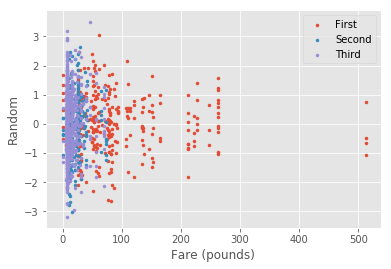

In [97]:
labels = {1: 'First', 2: 'Second', 3: 'Third'}
for target in [1,2,3]:
    fares = [p.fare for p in passengers
             if p.pclass == target and p.fare is not None]
    plt.scatter(fares, np.random.randn(len(fares)), 
                marker='.', label=labels[target])
plt.xlabel('Fare (pounds)')
plt.ylabel('Random')
plt.legend()

In [82]:
t_x = 17
print(t_x + 3)

20


In [134]:
import sklearn
from sklearn.model_selection import train_test_split

train_p, test_p = train_test_split(passengers, 
                                   random_state=42, 
                                   test_size=0.2)

len(train_p), len(test_p)

(1047, 262)

In [137]:
train_y = np.array([p.survived for p in train_p])
test_y = np.array([p.survived for p in test_p])

train_X = np.array([p.features() for p in train_p])
test_X = np.array([p.features() for p in test_p])